# Introducción a la Transformada de Fourier
- [Introducción](#introducción)
- [Aplicaciones](#aplicaciones)
  - [Aplicación cotidiana](#caso-de-uso-de-sistema-dual-tone-multi-frequency-dtmf)
  - [Aplicación en biomédica](#aplicaciones-en-señales-biomédicas)
- [Consideraciones](#consideraciones)

## Introducción

La Transformada de Fourier es una herramienta matemática que nos permite analizar una señal en términos de sus componentes de frecuencia. Esta herramienta presenta dos versiones, la Transformada de Fourier Continua (FT), la cuál se aplica cuando se trabaja con señales analógicas, y la Transformada de Fourier Discreta (DFT), la cuál es útil cuando se trabaja con señales digitales como las que se trabajarán en este curso.

La ecuación de la versión discreta de la Transformada de Fourier es:

$$ X[k] = \sum_{n=0}^{N-1} x[n] \cdot e^{-i \frac{2\pi}{N}kn} $$

Donde:
- $X[k]$ es la Transformada Discreta de Fourier de la señal $x[n]$.
- $k$ es el índice de frecuencia, que varía de $0$ a $N-1$, donde $N$ es la longitud de la señal $x[n]$.
- $x[n]$ es la señal en el dominio del tiempo discreto.
- $e$ es el número de Euler, la base del logaritmo natural.
- $i$ es la unidad imaginaria, donde $i^2 = -1$.
- $N$ es la longitud de la señal, que debe ser un número entero positivo y potencia de 2 para aplicar la DFT de manera eficiente.

Al aplicar la DFT a una señal, se obtiene como resultado un vector de números complejos, donde cada número complejo representa una componente de frecuencia de la señal. Para visualizar la DFT de una señal, se puede graficar la magnitud de cada número complejo en función de su frecuencia, obteniendo así el espectro de frecuencias de la señal.


Por ejemplo, al aplicar la transformada de Fourier a una onda senoidal con frecuencia de 440 Hz, se obiene una espectro de frecuencias donde solamente se observar un pico en 440 Hz. Esto es porque la onda senoidal es una onda pura, es decir, una onda que contiene una sola frecuencia.

<img src="../figures/Fourier_1.png">


En cambio, si se aplica la transformada de Fourier a una onda cuadrada, se obtiene un espectro de frecuencias donde se observan picos en 440 Hz, 1320 Hz, 2200 Hz, 3080 Hz, etc. Esto es porque la onda cuadrada es una onda que contiene múltiples frecuencias.


<img src="../figures/Fourier_2.png">


In [1]:
# Para experimentar más con el efecto de la suma de senoidales
import IPython
IPython.display.IFrame("https://phet.colorado.edu/sims/html/fourier-making-waves/latest/fourier-making-waves_all.html",
                       width=800, height=600)


## Aplicaciones

### Caso de uso de sistema Dual-Tone Multi-Frequency (DTMF)

El sistema DTMF es un método de marcación telefónica utilizado en la mayoría de los teléfonos y sistemas de comunicación para transmitir información numérica y alfanumérica a través de la red telefónica.

En el sistema DTMF, cada tecla en un teclado telefónico está asociada con una combinación única de dos frecuencias: una frecuencia alta y una frecuencia baja. Estas frecuencias se seleccionan de un conjunto de ocho frecuencias predefinidas.

El siguiente esquema muestra la relación entre las teclas del teclado telefónico y las frecuencias DTMF correspondientes:

|        | 1209 Hz | 1336 Hz | 1477 Hz | 1633 Hz |
| -------| ------- | ------- | ------- | ------- |
| 697 Hz | 1       | 2       | 3       | A       |
| 770 Hz | 4       | 5       | 6       | B       |
| 852 Hz | 7       | 8       | 9       | C       |
| 941 Hz | *       | 0       | #       | D       |

Para transmitir una señal DTMF, el sistema genera una combinación de tonos simultáneos de alta y baja frecuencia correspondientes a la tecla presionada. Estos tonos se mezclan y se envían a través de la línea telefónica. En el extremo receptor, el tono se separa nuevamente en sus componentes de frecuencia utilizando técnicas de procesamiento de señales, y luego se decodifica para determinar la tecla presionada.

Aquí es donde la Transformada de Fourier entra en juego. Para separar los tonos DTMF mezclados en sus componentes de frecuencia individuales, se aplica un proceso de análisis en el dominio de la frecuencia. La Transformada de Fourier, en sus diversas formas es una herramienta comúnmente utilizada para realizar este análisis.

Veamoslo usando Python:


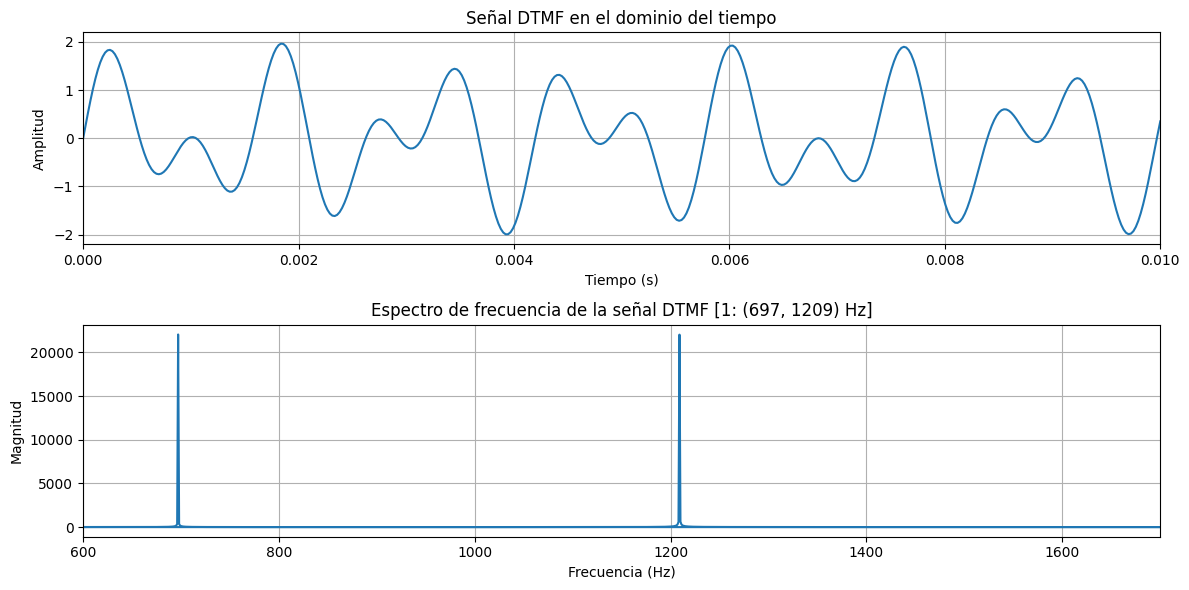

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Diccionario de tonos DTMF
tonos = {"1": (697, 1209), "2": (697, 1336), "3": (697, 1477), "A": (697, 1633),
         "4": (770, 1209), "5": (770, 1336), "6": (770, 1477), "B": (770, 1633),
         "7": (852, 1209), "8": (852, 1336), "9": (852, 1477), "C": (852, 1633),
         "*": (941, 1209), "0": (941, 1336), "#": (941, 1477), "D": (941, 1633)}

# Creación de la señal
tono = "1"
tono_frecuencias = tonos[tono]
duracion = 1
muestreo = 44100
t = np.linspace(0, duracion, duracion * muestreo)
señal = np.sin(2 * np.pi * tono_frecuencias[0] * t) + np.sin(2 * np.pi * tono_frecuencias[1] * t)

# Obtención de la transformada de Fourier
fft = np.fft.fft(señal)
frecuencias = np.fft.fftfreq(len(señal), 1 / muestreo)

# Gráfica de la señal
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, señal)
plt.title("Señal DTMF en el dominio del tiempo")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.xlim(0, 0.01)
plt.grid()

# Gráfica del espectro en frecuencia
plt.subplot(2, 1, 2)
plt.plot(frecuencias, np.abs(fft))
plt.title(f"Espectro de frecuencia de la señal DTMF [{tono}: {tono_frecuencias} Hz]")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud")
plt.xlim(600, 1700)
plt.grid()

plt.tight_layout()
plt.show()


### Aplicaciones en señales biomédicas

En el campo de la señales biomédicas, la Transformada de Fourier puede ser útil para diversos propósitos, entre los que se pueden destacar:

- **Filtrado de señales**: La Transformada de Fourier es ampliamente utilizada en el filtrado de señales biomédicas para eliminar ruido y componentes no deseados. El filtrado en el dominio de la frecuencia permite suprimir frecuencias específicas, lo que puede ser útil para eliminar artefactos o interferencias presentes en las señales, mejorando la calidad y precisión del análisis. Por ejemplo, en un electrocardiograma (ECG), la remoción de ruido de línea de base puede facilitar la detección de anomalías en el ritmo cardíaco.

- **Análisis de espectros**: La Transformada de Fourier permite descomponer una señal en sus componentes de frecuencia, lo que permite un análisis más detallado del contenido espectral de las señales biomédicas. Esto es especialmente útil para el análisis de ondas cerebrales en electroencefalogramas (EEG) y para identificar patrones de frecuencia característicos en otras señales biomédicas. El análisis de espectros puede proporcionar información valiosa para el diagnóstico y monitoreo de diversas condiciones médicas.

- **Análisis de variabilidad de señales**: En el análisis de señales biomédicas, como la variabilidad del ritmo cardíaco (HRV) en un electrocardiograma o la variabilidad de la frecuencia respiratoria, la Transformada de Fourier puede ser aplicada para analizar los cambios en las frecuencias presentes en la señal a lo largo del tiempo. Estos análisis pueden proporcionar información valiosa sobre el estado fisiológico y la respuesta del cuerpo a diferentes estímulos.

- **Caracterización de eventos**: La Transformada de Fourier también se aplica para analizar la duración y frecuencia de eventos específicos en señales biomédicas. Por ejemplo, en el análisis de la actividad muscular en electromiogramas (EMG), la Transformada de Fourier puede ser utilizada para caracterizar la frecuencia de las contracciones musculares o para detectar patrones de actividad específicos.


Veamos un ejemplo de cómo la Transformada de Fourier puede ser utilizada para identificar componentes no deseados en una señal de ECG.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def fou(senal,sr):
    """FUNCIÓN PARA CALCULAR FFT EN dB DE UNA SEÑAL"""
    f  = np.fft.fft(senal)
    h  = 20*np.log10(np.abs(f))[:int(f.shape[0]//2)]
    w  = np.linspace(0,sr//2,f.shape[0]//2 )

    return h, w

ECG_60 = np.load("../signals/ECG_60.npz")
ECG = ECG_60['ECG_60']/1600 #Se divide entre 1600 porque el registro se realizó con una ganancia de 1600
sr  = ECG_60['sr']
t   = np.linspace(0, len(ECG)/sr, len(ECG))


Al graficar la señal en el dominio del tiempo, podemos observar la forma típica de un ECG, sin embargo se aprecia contaminada por alguna frecuencia no deseada.


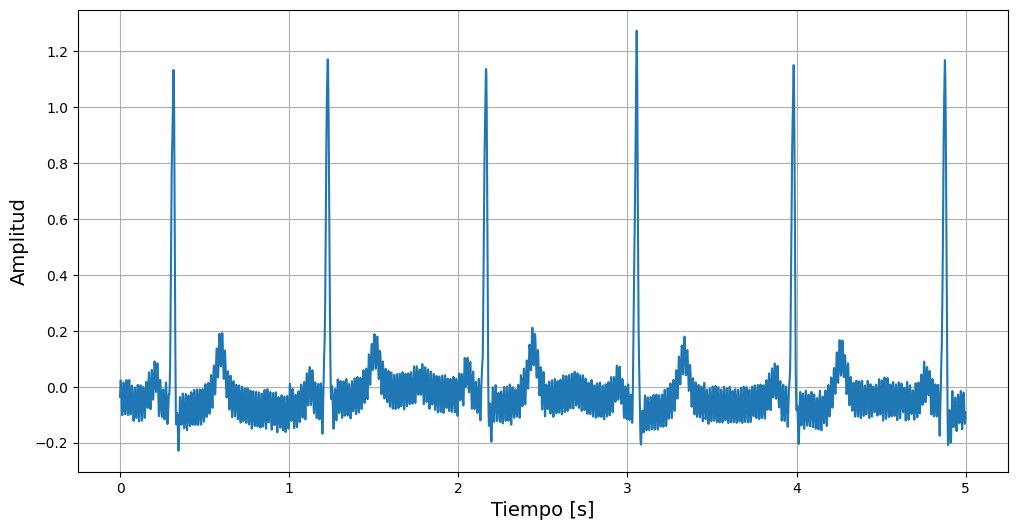

In [4]:
plt.figure(figsize=(12, 6))
plt.plot(t[:5000], ECG[:5000])    
plt.xlabel('Tiempo [s]',fontsize=14)
plt.ylabel('Amplitud', fontsize=14)
plt.grid(True)
plt.show()


Al obtener su espectro en frecuencia usando la Transformada de Fourier, podemos observar que esa señal tiene un componente de frecuencia de 60 Hz, que es la frecuencia de la corriente alterna en México. Por lo tanto, es necesario eliminar este componente de frecuencia para poder analizar la señal de interés.


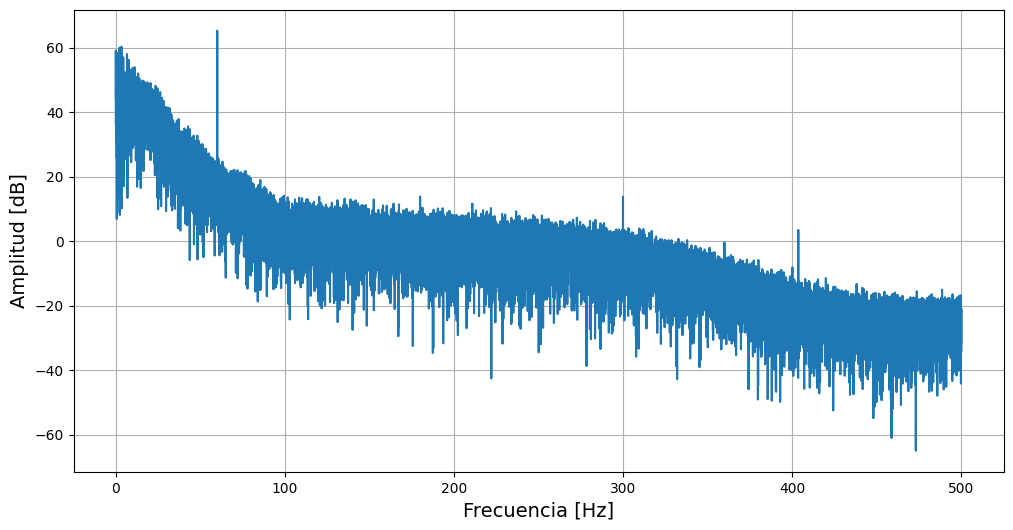

In [5]:
h, w = fou(ECG, sr)

plt.figure(figsize=(12,6))
plt.plot(w,h)
plt.xlabel('Frecuencia [Hz]', fontsize=14)
plt.ylabel('Amplitud [dB]', fontsize=14)
plt.grid(True)
plt.show()


### Consideraciones

- **Resolución limitada en el tiempo**: La TF tiene una resolución limitada en el tiempo, lo que significa que no es adecuada para analizar eventos que ocurren en un intervalo de tiempo muy corto. En aplicaciones donde es necesario un análisis de alta resolución temporal, otras técnicas, como las Wavelets, pueden ser más apropiadas.

- **Asunción de estacionariedad**: La TF asume que la señal es estacionaria en el tiempo, es decir, que sus propiedades estadísticas no cambian a lo largo del tiempo. Sin embargo, muchas señales biomédicas son no estacionarias, lo que puede limitar la efectividad de la TF en ciertos escenarios. En tales casos, se requieren técnicas más avanzadas, como el análisis tiempo-frecuencia.

- **No detecta eventos específicos en el tiempo**: La TF no proporciona información precisa sobre el momento en que ocurren eventos específicos en una señal, ya que solo muestra la distribución de energía en el dominio de la frecuencia. Para la detección precisa de eventos en el tiempo, se necesitan técnicas específicas, como el análisis de tiempo-frecuencia o métodos basados en eventos.

### Referencias
- Antoniou, A. (2018). Digital filters: Analysis, design, and signal processing applications. McGraw-Hill Education.
- Ingle, V. K., & Proakis, J. G. (2006). Digital Signal Processing Using MATLAB (3rd ed.). Mason, OH: CENGAGE Learning Custom Publishing.
